# Group 32 Project Proposal 

### Carol Dong, Aria Donthineni, Grace Ellis, Nao Kawano

#### Introduction

Heart disease is considered one of the leading causes of deaths in the US and costs billions in terms of healthcare and loss of productivity. There are many factors that could lead to an increase in developing heart disease. High cholesterol can lead to build up in the arteries of the heart, reducing blood flow. And high blood pressure damages the lining of arteries which makes the heart susceptible to buildup of plaque (Centers for Disease Control, 2022).  Age is another cause, as the older a person is, the higher the risk they are to gain heart diseases (US Department of Health, n.d.). 

This database uses data on 13 attributes of patients from a Cleveland clinic to predict the presence of heart disease. A model was created from this data and the accuracy was then tested on patients in Hungary, California, and Switzerland. 

Thus we shall be addressing the question: *What is the severity of the heart disease determined by the patient’s age, cholesterol, and resting blood pressure?* 



In [2]:
#importing libaries 
library(tidyverse)
library(tidymodels)
library(RColorBrewer)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [4]:
#wrangling and tidying the data 
heart_diseases<- read_csv("https://raw.githubusercontent.com/gellis03/DSCI-100-project/main/data/processed.cleveland.data",
                         col_names= c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"))

#heart_diseases$sex[heart_diseases$sex == 1] <- "Male"
#heart_diseases$sex[heart_diseases$sex == 0] <- "Female"

heart_diseases<- heart_diseases |> 
#    mutate(diagnosis = ifelse (is.na(num), NA, (num>0))) |>
    mutate(sex= as_factor(sex), cp= as_factor(cp), fbs= as_factor(fbs), 
           restecg= as_factor(restecg), exang= as_factor(exang), 
           slope= as_factor(slope), thal= as_factor(slope), num=as_factor(num))

#spliting dataframe into training and testing 
heart_split<- initial_split(heart_diseases, prop= 0.75, strata= num)
heart_training<- training(heart_split)
heart_test<- testing(heart_split)

head(heart_training)


Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<fct>,<dbl>,<fct>,<chr>,<fct>,<fct>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,3,0
41,0,2,130,204,0,2,172,0,1.4,1,0.0,1,0
56,1,2,120,236,0,0,178,0,0.8,1,0.0,1,0
57,1,4,140,192,0,0,148,0,0.4,2,0.0,2,0
44,1,2,120,263,0,0,173,0,0.0,1,0.0,1,0
48,0,3,130,275,0,0,139,0,0.2,1,0.0,1,0


In [6]:
#summarizing table 

heart_summary<- heart_training |>
    group_by(num) |>
    summarize(mean_age= mean(age), min_age= min(age), max_age= max(age),
              mean_chol= mean(chol), min_chol= min(chol), max_chol=max(chol),
              mean_bp= mean(trestbps), min_bp = min(trestbps), max_bp= max(trestbps),
#              mean_th= mean(thalach), min_th = min(thalach), max_th= max(thalach),
              number_patients= n())
heart_summary
        

num,mean_age,min_age,max_age,mean_chol,min_chol,max_chol,mean_bp,min_bp,max_bp,number_patients
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
0,52.90164,29,76,242.0082,141,564,128.7623,94,180,122
1,55.73171,35,70,251.1707,149,335,133.8293,108,192,41
2,57.84615,42,69,256.3462,169,409,134.8846,100,180,26
3,56.53846,43,68,242.4231,131,353,138.7692,110,200,26
4,58.36364,38,77,264.3636,166,407,137.6364,112,165,11


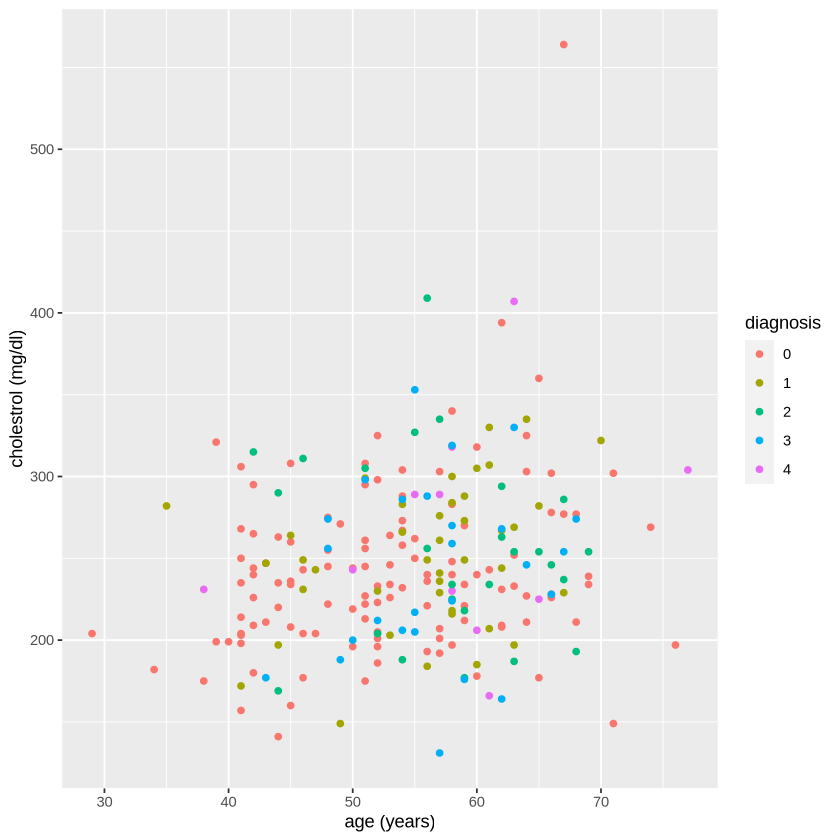

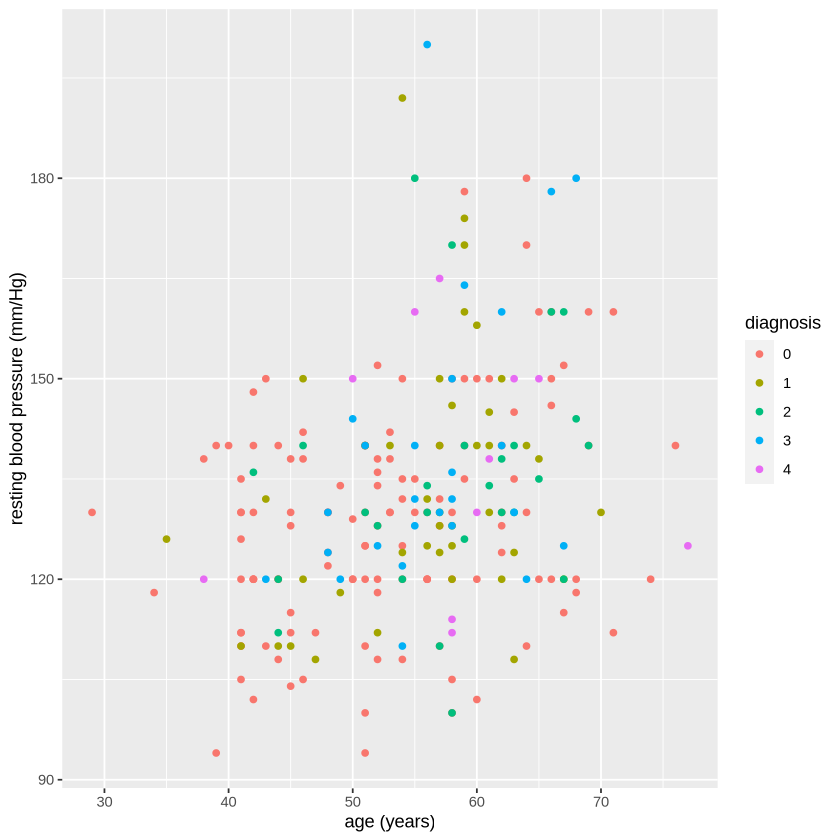

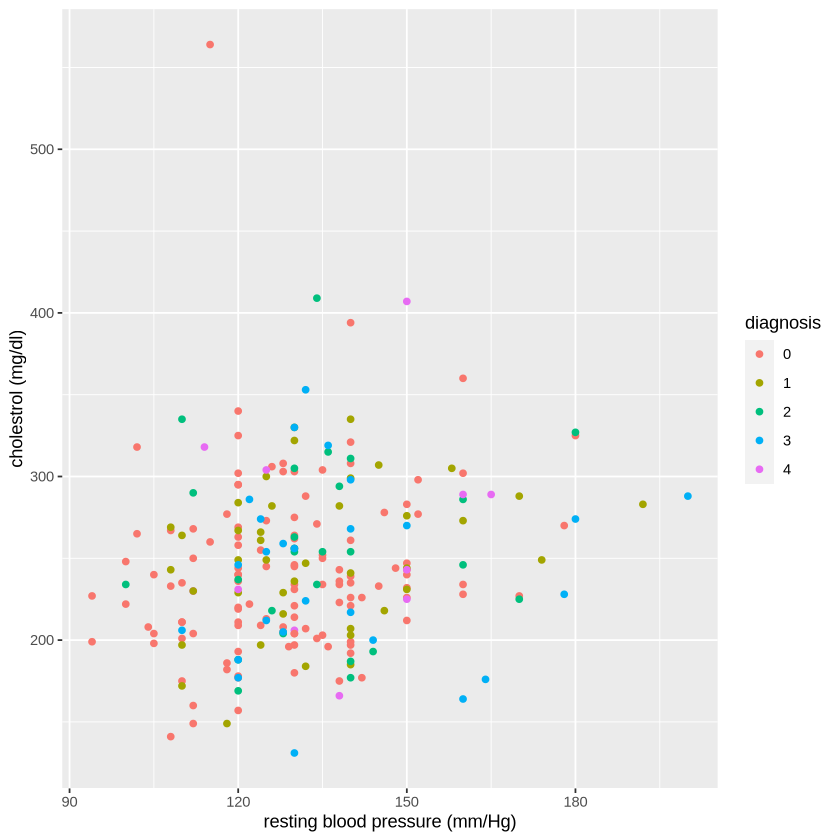

In [9]:
#visualzing the data 

plot_1<- ggplot(heart_training, aes(x=age, y=chol)) +
    geom_point(aes(color=num))+
    labs(x="age (years)", y="cholestrol (mg/dl)", color= "diagnosis")

plot_2<- ggplot(heart_training, aes(x=age, y=trestbps)) +
    geom_point(aes(color=num))+
    labs(x="age (years)", y="resting blood pressure (mm/Hg)", color= "diagnosis")

plot_3<- ggplot(heart_training, aes(x=trestbps, y=chol)) +
    geom_point(aes(color=num))+
    labs(y="cholestrol (mg/dl)", x="resting blood pressure (mm/Hg)", color= "diagnosis")



plot_1
plot_2
plot_3



### Methods

### Expected Outcomes and Significance 

## Bibliography

Centers for Disease Control and Prevention. (2022, September 8). Heart disease and stroke. Centers for Disease Control and Prevention. https://www.cdc.gov/chronicdisease/resources/publications/factsheets/heart-disease-stroke.htm#:~:text=Leading%20risk%20factors%20for%20heart,unhealthy%20diet%2C%20and%20physical%20inactivity 

U.S. Department of Health and Human Services. (n.d.). Heart health and aging. National Institute on Aging. https://www.nia.nih.gov/health/heart-health/heart-health-and-aging#:~:text=Adults%20age%2065%20and%20older,risk%20of%20developing%20cardiovascular%20disease 